In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.Category.value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [ ]:
df.shape

(5572, 3)

In [ ]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category vs spam

<ipython-input-4-fc12c7fa957f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='spam', y='Category', inner='box', palette='Dark2')


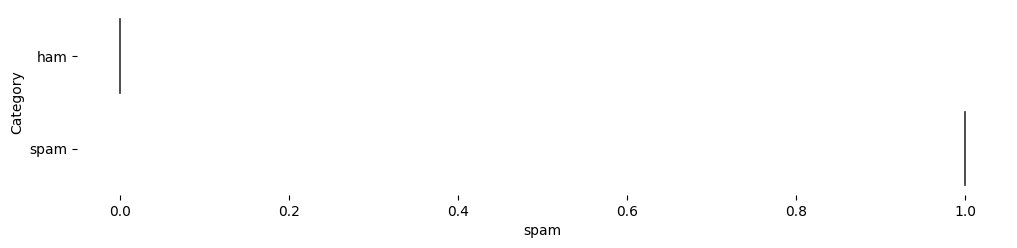

In [ ]:
# @title Category vs spam

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='spam', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Spam

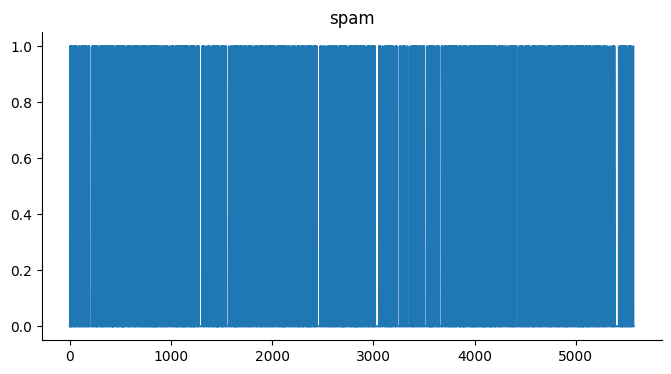

In [ ]:
# @title spam

from matplotlib import pyplot as plt
df['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

Category

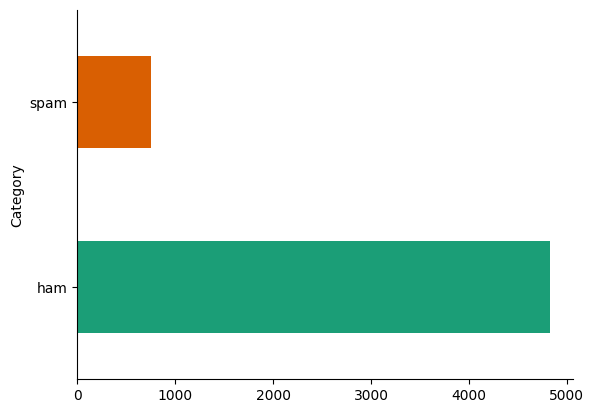

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

spam

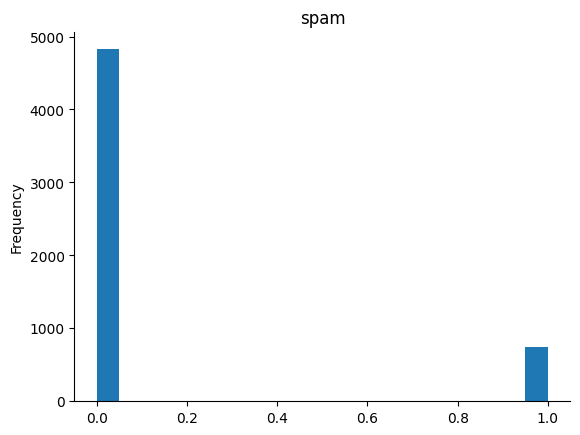

In [ ]:
# @title spam

from matplotlib import pyplot as plt
df['spam'].plot(kind='hist', bins=20, title='spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [ ]:
X_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train[:4]

,Message
5254,I didnt get anything da
4314,"I wasn't well babe, i have swollen glands at m..."
4862,Nokia phone is lovly..
3560,URGENT! We are trying to contact U Todays draw...


In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train[:4]

,spam
5254,0
4314,0
4862,0
3560,1


In [ ]:
type(X_train.values)

numpy.ndarray

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7724 sparse matrix of type '<class 'numpy.int64'>'
	with 59441 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train_cv.shape

(4457, 7724)

In [ ]:
v.get_feature_names_out()[1771]

'chart'

In [ ]:
v.vocabulary_

{'didnt': 2329,
 'get': 3128,
 'anything': 1019,
 'da': 2170,
 'wasn': 7377,
 'well': 7437,
 'babe': 1206,
 'have': 3368,
 'swollen': 6647,
 'glands': 3159,
 'at': 1134,
 'my': 4678,
 'throat': 6858,
 'what': 7460,
 'did': 2326,
 'you': 7690,
 'end': 2605,
 'up': 7171,
 'doing': 2423,
 'nokia': 4812,
 'phone': 5192,
 'is': 3757,
 'lovly': 4252,
 'urgent': 7192,
 'we': 7401,
 'are': 1068,
 'trying': 7049,
 'to': 6921,
 'contact': 2013,
 'todays': 6928,
 'draw': 2467,
 'shows': 6118,
 'that': 6797,
 'won': 7560,
 '800': 649,
 'prize': 5421,
 'guaranteed': 3276,
 'call': 1635,
 '09050000460': 161,
 'from': 3034,
 'land': 4011,
 'line': 4136,
 'claim': 1858,
 'j89': 3788,
 'po': 5268,
 'box245c2150pm': 1486,
 'then': 6811,
 'any': 1011,
 'special': 6340,
 'there': 6816,
 'this': 6838,
 'the': 6800,
 '2nd': 412,
 'attempt': 1144,
 '1000call': 253,
 '09071512432': 233,
 'b4': 1201,
 '300603t': 435,
 'csbcm4235wc1n3xx': 2121,
 'callcost150ppmmobilesvary': 1640,
 'max': 4402,
 '50': 548,
 'col

In [ ]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.where(X_train_np[0]!=0)

(array([1019, 2170, 2329, 3128]),)

In [ ]:
X_train_np[0][1771]

0

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [ ]:
X_test_cv = v.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       977
           1       0.94      0.94      0.94       138

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
# Enregistrer le vectorizer dans un fichier
import pickle
with open('vectorizer_spam.pkl', 'wb') as f:
    pickle.dump(v, f)

In [ ]:
import pickle

# Enregistrer le modèle dans un fichier
with open('multinomial_nb_model_spam.pkl', 'wb') as f:
    pickle.dump(model, f)

 Séparation des emails en deux DataFrames distincts

In [ ]:
# Séparer les emails spam et non-spam
df_spams = df[df['spam'] == 1]
df_non_spams = df[df['spam'] == 0]

In [ ]:
df_spams

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
df_non_spams

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
6,ham,Even my brother is not like to speak with me. ...,0
...,...,...,...
5565,ham,Huh y lei...,0
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
# Enregistrer les DataFrames dans des fichiers CSV
df_spams.to_csv('spams.csv', index=False)
df_non_spams.to_csv('non_spams.csv', index=False)

print("Datasets spams et non-spams créés et enregistrés.")

Datasets spams et non-spams créés et enregistrés.


In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Fonction pour créer une base de données et insérer des emails
def create_database(db_name, dataframe):
    conn = sqlite3.connect(db_name)
    c = conn.cursor()

    # Créer la table
    c.execute('''CREATE TABLE emails (
                 id INTEGER PRIMARY KEY AUTOINCREMENT,
                 message TEXT NOT NULL,
                 category TEXT,
                 spam INTEGER)''')

    # Insérer les emails dans la table
    for index, row in dataframe.iterrows():
        c.execute("INSERT INTO emails (message, category, spam) VALUES (?, ?, ?)",
                  (row['Message'], row['Category'], row['spam']))

    # Sauvegarder (commit) les changements et fermer la connexion
    conn.commit()
    conn.close()

# Créer et remplir la base de données des spams
create_database('spams.db', df_spams)

# Créer et remplir la base de données des non-spams
create_database('non_spams.db', df_non_spams)

print("Bases de données spams et non-spams créées et remplies avec succès.")

Bases de données spams et non-spams créées et remplies avec succès.


In [ ]:
import sqlite3

# Connexion à la base de données des spams
conn_spams = sqlite3.connect('spams.db')
cursor_spams = conn_spams.cursor()

# Afficher les premières lignes de la table emails des spams
cursor_spams.execute("SELECT * FROM emails LIMIT 5")
print("Contenu de la base de données spams:")
print(cursor_spams.fetchall())

# Fermer la connexion à la base de données des spams
conn_spams.close()

# Connexion à la base de données des non-spams
conn_non_spams = sqlite3.connect('non_spams.db')
cursor_non_spams = conn_non_spams.cursor()

# Afficher les premières lignes de la table emails des non-spams
cursor_non_spams.execute("SELECT * FROM emails LIMIT 5")
print("\nContenu de la base de données non-spams:")
print(cursor_non_spams.fetchall())

# Fermer la connexion à la base de données des non-spams
conn_non_spams.close()


Contenu de la base de données spams:
[(1, "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'spam', 1), (2, "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'spam', 1), (3, 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'spam', 1), (4, 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030', 'spam', 1), (5, 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info', 'spam', 1)]

Contenu de la base de données non-spams:
[(1, 'Go until jurong point, crazy.. Available only in bugis n great wo

Priority

In [ ]:
import sqlite3

# Connexion à la base de données des non-spams
conn_non_spams = sqlite3.connect('non_spams.db')
cursor_non_spams = conn_non_spams.cursor()

# Ajouter une colonne "Priorité" à la table emails
cursor_non_spams.execute("ALTER TABLE emails ADD COLUMN priority INTEGER")

# Sauvegarder (commit) les changements et fermer la connexion
conn_non_spams.commit()
conn_non_spams.close()

print("La colonne 'Priorité' a été ajoutée à la table 'emails' dans la base de données des non-spams.")

La colonne 'Priorité' a été ajoutée à la table 'emails' dans la base de données des non-spams.


Prétraitement du texte

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fonction de prétraitement des textes
def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Appliquer le prétraitement aux emails
df_non_spams['processed_message'] = df_non_spams['Message'].apply(preprocess_text)


# Vérifier les premières lignes du DataFrame après le prétraitement
print(df_non_spams.head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  Category                                            Message  spam  \
0      ham  Go until jurong point, crazy.. Available only ...     0   
1      ham                      Ok lar... Joking wif u oni...     0   
3      ham  U dun say so early hor... U c already then say...     0   
4      ham  Nah I don't think he goes to usf, he lives aro...     0   
6      ham  Even my brother is not like to speak with me. ...     0   

                                   processed_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
3                u dun say early hor u c already say  
4                nah think go usf life around though  
6      even brother like speak treat like aid patent  


<ipython-input-38-2d4af1e680c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_spams['processed_message'] = df_non_spams['Message'].apply(preprocess_text)


Extraire les caractéristiques et les convertir en numériques

In [ ]:
import re
from dateutil import parser

# Définir les mots-clés importants
important_senders = ['boss@example.com', 'keyclient@example.com']
important_subject_keywords = ['important', 'urgent', 'asap']
important_content_keywords = ['important', 'urgent', 'asap']
response_request_keywords = ['please respond', 'reply', 'action needed']
# Fonction pour extraire les caractéristiques
def extract_features(content):
    features = {}

    if isinstance(content, str):  # Vérifier si le contenu est une chaîne de caractères
        # Utiliser des expressions régulières pour extraire l'adresse email de l'expéditeur
        sender_match = re.search(r'From:\s*([^<\s]+@[^>\s]+)', content)
        sender = sender_match.group(1) if sender_match else ''
        features['important_sender'] = 1 if sender in important_senders else 0

        subject_match = re.search(r'Subject:\s*(.*)', content)
        subject = subject_match.group(1) if subject_match else ''
        features['important_subject'] = 1 if any(keyword in subject.lower() for keyword in important_subject_keywords) else 0

        features['important_content'] = 1 if any(keyword in content.lower() for keyword in important_content_keywords) else 0

        features['response_request'] = 1 if any(keyword in content.lower() for keyword in response_request_keywords) else 0

        date_match = re.search(r'Date:\s*(.*)', content)
        date_str = date_match.group(1) if date_match else ''
        try:
            time_sent = parser.parse(date_str)
            features['working_hours'] = 1 if 9 <= time_sent.hour <= 17 else 0
        except:
            features['working_hours'] = 0

        features['attachments'] = 1 if 'attachment' in content.lower() else 0

        features['previous_interactions'] = 1  # Assumer qu'il y a des interactions précédentes
    else:
        # Si le contenu n'est pas une chaîne de caractères, initialiser toutes les caractéristiques à 0
        features = {'important_sender': 0, 'important_subject': 0, 'important_content': 0,
                    'response_request': 0, 'working_hours': 0, 'attachments': 0, 'previous_interactions': 0}

    return features
#renvoie un dictionnaire de caractéristiques avec des valeurs binaires indiquant la présence ou l'absence de chaque caractéristique
# Appliquer l'extraction des caractéristiques aux emails
features_list = df_non_spams['Message'].apply(extract_features)#crée une liste de dictionnaires de caractéristiques pour chaque email.
features_df = pd.DataFrame(features_list.tolist()) #Conversion des caractéristiques en DataFrame


# Combiner les caractéristiques avec le contenu des emails
df_non_spams = pd.concat([df_non_spams, features_df], axis=1)

Définir une fonction pour calculer la priorité

In [ ]:
import pandas as pd

# Supposons que df_non_spams est déjà défini et contient les colonnes suivantes
required_columns = ['important_sender', 'important_subject', 'important_content', 'response_request', 'working_hours', 'attachments', 'previous_interactions']


# Remplacer les valeurs manquantes dans les colonnes de caractéristiques par des zéros
required_columns = ['important_sender', 'important_subject', 'important_content', 'response_request', 'working_hours', 'attachments', 'previous_interactions']
df_non_spams[required_columns] = df_non_spams[required_columns].fillna(0)
# Assurez-vous que toutes les colonnes nécessaires sont présentes dans le DataFrame et initialisez-les à 0 si elles sont manquantes
required_columns = [
    'important_sender', 'important_subject', 'important_content',
    'response_request', 'working_hours', 'attachments', 'previous_interactions'
]
for column in required_columns:
    if column not in df_non_spams:
        df_non_spams[column] = 0

# Définir une priorité basée sur les caractéristiques extraites
def define_priority(row):
    priority_score = (row['important_sender'] +
                      row['important_subject'] +
                      row['important_content'] +
                      row['response_request'] +
                      row['working_hours'] +
                      row['attachments'] +
                      row['previous_interactions'])
    if priority_score >= 5:
        return 'High'
    elif priority_score >= 3:
        return 'Medium'
    else:
        return 'Low'

df_non_spams['priority'] = df_non_spams.apply(define_priority, axis=1)



# Appliquer la fonction de définition de priorité
df_non_spams['priority'] = df_non_spams.apply(define_priority, axis=1)

# Vérifier les premières lignes du DataFrame après avoir défini les priorités
print(df_non_spams.head())


  Category                                            Message  spam  \
0      ham  Go until jurong point, crazy.. Available only ...   0.0   
1      ham                      Ok lar... Joking wif u oni...   0.0   
3      ham  U dun say so early hor... U c already then say...   0.0   
4      ham  Nah I don't think he goes to usf, he lives aro...   0.0   
6      ham  Even my brother is not like to speak with me. ...   0.0   

                                   processed_message  important_sender  \
0  go jurong point crazy available bugis n great ...               0.0   
1                            ok lar joking wif u oni               0.0   
3                u dun say early hor u c already say               0.0   
4                nah think go usf life around though               0.0   
6      even brother like speak treat like aid patent               0.0   

   important_subject  important_content  response_request  working_hours  \
0                0.0                0.0             

Encoder les étiquettes de priorité

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack



# Remplacer les valeurs NaN dans la colonne 'processed_message' par des chaînes vides
df_non_spams['processed_message'].fillna('', inplace=True)

# Vectorisation des données textuelles
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df_non_spams['processed_message'])

# Appliquer l'extraction des caractéristiques aux emails
features_list = df_non_spams['Message'].apply(extract_features) # crée une liste de dictionnaires de caractéristiques pour chaque email.
features_df = pd.DataFrame(features_list.tolist()) # Conversion des caractéristiques en DataFrame

# Remplacer les valeurs NaN dans les colonnes de caractéristiques par des zéros
required_columns = ['important_sender', 'important_subject', 'important_content', 'response_request', 'working_hours', 'attachments', 'previous_interactions']
features_df[required_columns] = features_df[required_columns].fillna(0)

# Combiner les vecteurs TF-IDF avec les autres caractéristiques
X = hstack([X_text, features_df.values])

# Encoder les étiquettes de priorité
le = LabelEncoder()
df_non_spams['priority_encoded'] = le.fit_transform(df_non_spams['priority'])
y = df_non_spams['priority_encoded']







Diviser les données en ensembles d'entraînement et de test

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en caractéristiques (X) et étiquettes (y)
X = df_non_spams.drop(columns=['Message', 'priority', 'Category', 'processed_message', 'priority_encoded'])
y = df_non_spams['priority_encoded']

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Entraîner un modèle de classification

In [ ]:
# Initialiser et entraîner le modèle :Utilisant Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
# Sauvegarder le TfidfVectorizer
import pickle
with open('vectorizerPriority.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [ ]:
import pickle

# Sauvegarder le modèle RandomForestClassifier
with open('Priority_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Évaluer le modèle

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prédire les priorités pour l'ensemble de test
y_pred = model.predict(X_test)

# Afficher le rapport de classification et l'exactitude
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1642
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1643
   macro avg       0.50      0.50      0.50      1643
weighted avg       1.00      1.00      1.00      1643

Accuracy: 0.9993913572732805


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_non_spams

,Category,Message,spam,processed_message,important_sender,important_subject,important_content,response_request,working_hours,attachments,previous_interactions,priority,priority_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0.0,go jurong point crazy available bugis n great ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
1,ham,Ok lar... Joking wif u oni...,0.0,ok lar joking wif u oni,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
3,ham,U dun say so early hor... U c already then say...,0.0,u dun say early hor u c already say,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0,nah think go usf life around though,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
6,ham,Even my brother is not like to speak with me. ...,0.0,even brother like speak treat like aid patent,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
4798,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
4808,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0
4821,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,0


Créer un Modèle de Suggestion de réponse

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import joblib

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
!pip install pandas transformers
# Install openai
!pip install openai

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [ ]:
from transformers import pipeline
import numpy as np
import openai
import pandas as pd
import os

# Configurer votre clé API OpenAI
openai_api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Charger le pipeline de génération de texte
generator = pipeline('text-generation', model='gpt2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def generate_suggestions(email_text, category, priority, max_length=50, num_suggestions=2):
    """
    Génère des suggestions d'expressions pour répondre à un email en utilisant l'API OpenAI.

    Parameters:
    - email_text: Le texte de l'email en cours de rédaction.
    - category: La catégorie de l'email.
    - priority: La priorité de l'email.
    - max_length: La longueur maximale de chaque suggestion générée.
    - num_suggestions: Le nombre de suggestions à générer.

    Returns:
    - Une liste de suggestions générées automatiquement.
    """
    prompt = (f"Email reçu (catégorie : {category}, priorité : {priority}) : {email_text}\n"
              "Suggestions de phrases courtes pour répondre :")

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_length,
        n=num_suggestions,
        stop=None,
        temperature=0.7
    )

    suggestions = [choice['message']['content'].strip() for choice in response['choices']]
    return suggestions
#Fonction pour évaluer la qualité de la réponse :L'évaluation est basée sur la longueur de la réponse
def evaluate_response_quality(response):
    """
    Évalue la qualité d'une réponse générée en fonction de critères simples.
    Ici, nous pourrions ajouter des critères plus sophistiqués si nécessaire.

    Parameters:
    - response: La réponse générée à évaluer.

    Returns:
    - Une évaluation de la qualité de la réponse (par exemple, 'Good', 'Average', 'Poor').
    """
    # Exemple simple d'évaluation basée sur la longueur de la réponse
    if len(response) > 20:
        return 'Good'
    elif len(response) > 10:
        return 'Average'
    else:
        return 'Poor'


In [ ]:
# Exemple de dataframe avec des emails, catégories et priorités
data = {
    'Category': ['ham', 'ham'],
    'Message': ["Go until jurong point, crazy.. Available only ...", "Ok lar... Joking wif u oni..."],
    'spam': [0, 0],
    'processed_message': ['go jurong point crazy available bugis n great ...', 'ok lar joking wif u oni'],
    'important_sender': [0, 0],
    'important_subject': [0, 0],
    'important_content': [0, 0],
    'response_request': [0, 0],
    'working_hours': [0, 0],
    'attachments': [0, 0],
    'previous_interactions': [1, 1],
    'priority': ['Low', 'Low'],
    'priority_encoded': [0, 0]
}
df = pd.DataFrame(data)

df['response'] = df.apply(lambda row: generate_response(row['Message'], row['priority'], generator), axis=1)

# Évaluer la qualité des réponses générées
df['response_quality'] = df['response'].apply(evaluate_response_quality)

# Afficher les réponses générées et leur qualité
for idx, row in df.iterrows():
    print(f"Email: {row['Message']}")
    print(f"Catégorie: {row['Category']}")
    print(f"Priorité: {row['priority']}")
    print(f"Réponse: {row['response']}")
    print(f"Qualité de la réponse: {row['response_quality']}")
    print()


 Créer un Modèle de Suggestion de reponse :combinaison de techniques de traitement du langage naturel (NLP) et de génération de texte

Configurer l'API OpenAI

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import joblib

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Install openai
!pip install openai






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import openai
import pandas as pd
import os

# Configurer votre clé API OpenAI
openai_api_key = os.getenv("OPENAI_API_KEY")





 fonction pour générer des suggestions d'expressions

In [ ]:
def generate_suggestions(email_text, category, priority, max_length=50, num_suggestions=2):
    """
    Génère des suggestions d'expressions pour répondre à un email en utilisant l'API OpenAI.

    Parameters:
    - email_text: Le texte de l'email en cours de rédaction.
    - category: La catégorie de l'email.
    - priority: La priorité de l'email.
    - max_length: La longueur maximale de chaque suggestion générée.
    - num_suggestions: Le nombre de suggestions à générer.

    Returns:
    - Une liste de suggestions générées automatiquement.
    """
    prompt = (f"Email reçu (catégorie : {category}, priorité : {priority}) : {email_text}\n"
              "Suggestions de phrases courtes pour répondre :")

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_length,
        n=num_suggestions,
        stop=None,
        temperature=0.7
    )

    suggestions = [choice['message']['content'].strip() for choice in response['choices']]
    return suggestions


Tester la fonction avec un dataframe d'exemple

In [ ]:
# Exemple de dataframe avec des emails, catégories et priorités
data = {
    'Category': ['ham', 'ham'],
    'Message': ["Go until jurong point, crazy.. Available only ...", "Ok lar... Joking wif u oni..."],
    'spam': [0, 0],
    'processed_message': ['go jurong point crazy available bugis n great ...', 'ok lar joking wif u oni'],
    'important_sender': [0, 0],
    'important_subject': [0, 0],
    'important_content': [0, 0],
    'response_request': [0, 0],
    'working_hours': [0, 0],
    'attachments': [0, 0],
    'previous_interactions': [1, 1],
    'priority': ['Low', 'Low'],
    'priority_encoded': [0, 0]
}
df = pd.DataFrame(data)


In [ ]:
# Générer des suggestions pour chaque email
for idx, row in df.iterrows():
    try:
        suggestions = generate_suggestions(row['Message'], row['Category'], row['priority'], num_suggestions=1)
        print(f"Email: {row['Message']}")
        print(f"Catégorie: {row['Category']}")
        print(f"Priorité: {row['priority']}")
        print("Suggestions:")
        for suggestion in suggestions:
            print(f"- {suggestion}")
        print()
    except openai.error.RateLimitError:
        print("Rate limit exceeded. Please try again later.")
        break
    except openai.error.InvalidRequestError as e:
        print(f"Invalid request: {e}")
        break
    except openai.error.OpenAIError as e:
        print(f"An error occurred: {e}")
        break

Rate limit exceeded. Please try again later.
